# 1 Create Fibrous Structure

## 1.1 Generate regular geometry

Length of edge: 200
Radius:12
R=12.000
5806000
0.72575


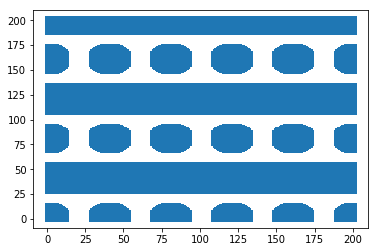

In [3]:
from __future__ import division
import sys as sys
import numpy as np
import itertools as iter
#from mayavi import mlab
import matplotlib.pyplot as plt

#mlab.init_notebook()
#mlab.test_plot3d()

n = 5
centers = np.array([[0.0,0.0,0.0]])
for a in range(1,n):
        centers1 = np.append(centers,[[a/n,0.0,0.0]],axis=0)
        centers2 = np.append(centers1,[[1.0,0.0,0.0]],axis=0)
        centers3 = np.append(centers2,[[0.0,0.0,2/n]],axis=0)
        centers4 = np.append(centers3,[[0.0,0.0,4/n]],axis=0)
        centers5 = np.append(centers4,[[a/n,0.0,2/n]],axis=0)
        centers6 = np.append(centers5,[[a/n,0.0,4/n]],axis=0)
        centers7 = np.append(centers6,[[1.0,0.0,2/n]],axis=0)
        centers8 = np.append(centers7,[[1.0,0.0,4/n]],axis=0)
        centers = centers8

center2 = np.array([[0.0,0.0,1/n]]) #center on left face

for b in range(1,n+1):
    center3 = np.append(center2,[[0.0,b/n,1/n]],axis=0)
    center4 = np.append(center3,[[0.0,0.0,3/n]],axis=0)
    center5 = np.append(center4,[[0.0,b/n,3/n]],axis=0)
    center6 = np.append(center5,[[0.0,0.0,1.0]],axis=0)
    center7 = np.append(center6,[[0.0,b/n,1.0]],axis=0)
    center2 = center7     


def node_is_void(p,L,R):
    R2 = R*R
    y=p[1]
    x=p[0]

    for k in range(0,len(centers)):
       c0=L*centers[k]
        
       c0[1]=y
       dv = p-c0
       d2 = np.inner(dv,dv)  #eqn of cylinder: 
       if (d2 < R2 ): 
            return 1   # if the point is inside cylinder


    for d in range(0,len(center2)):

        c1=L*center2[d]

        c1[0]=x

        dv = p-c1
        d2 = np.inner(dv,dv)  #eqn of cylinder: 
        if (d2 <= R2 ): 
            return 1   # if the point is inside cylinder
   

def generate_nodes(L,R,n):

   
    pos = range(0, L)
    nodes = iter.product(pos, repeat=3)

    rock  = []
    fluid = []
    
    with open('rock'+str(L)+'.dat', 'w') as f:
    
   
    
        for p in nodes:
            if node_is_void(p,L,R): 
                rock.append(p)  # membrane points
                node =np.reshape(np.append(np.array(p)+1,1),(1,4))
                np.savetxt(f, node, fmt="%d")  # file storing membrane points                                                                                                                                                                       
            else:
                fluid.append(p)  # appending fluid points
        f.close()

    nodes = iter.product(pos, repeat=3)

    rock  = np.array(rock)
    fluid = np.array(fluid)

    print len(fluid)
    porosity = len(fluid)/(L*L*L)
    print porosity


    x, y, z = zip(*(rock+1))

    #x, y, z = zip(*(fluid+1))  # simulation
    x=np.array(x)
    y=np.array(y)
    z=np.array(z)
    X=[]
    Y=[]
    Z=[]
    c=0
    
   # periodic for membrane
    for i in range(0,n):   
        for j in range(0,len(x)):
            X.append(x[j])
            Y.append(y[j])
            Z.append(z[j])

    plt.plot(X, Z,"s", fillstyle='full',markeredgecolor='none',markeredgewidth=0.0,ms=8)  #plot in 2d
    plt.show()
   
    #pts = mlab.points3d(X, Y, Z, color=(0.0, 0.5, 1.0), mode='cube',scale_factor=1)  #plot in 3d
    #mlab.show()  



if __name__ == '__main__':
    L =input("Length of edge: ")  #length of the edge
    #n=input("No. of layers: ") 
    #R=L/n
    R =input("Radius:")    #radius of cylinder
    #t=n*L
    print 'R=%.3f'%R
    #print 'Thickness: ', t
    generate_nodes(L,R,n)

## 1.2 Generate random geometry

In [9]:
from __future__ import division
#from mayavi import mlab
import numpy as np
import itertools as iter

pore_x=[]
pore_y=[]
pore_z=[]


f = open('pore200.dat')
## Read the first line 
line = f.readline()

c_y=0
c_x=0
c_z=0

rock_x=[]
rock_y=[]
rock_z=[]

Len=200


while line:
    c_z=0
    if (c_y==Len):
        c_y=0
        c_x+=1
    l=map(int,line.split())
        
    for i in range(0,len(l)):
        if l[i]!=0:
            rock_z.append(c_z)
            rock_x.append(c_x)
            rock_y.append(c_y)
            c_z+=1

        else:
            pore_z.append(c_z)
            pore_y.append(c_y)
            pore_x.append(c_x)
            c_z+=1

    line = f.readline()
    c_y+=1

f.close()



print len(rock_x)+len(pore_x),' ',len(rock_y)+len(pore_y),' ',len(rock_z)+len(pore_z)

x=np.array(rock_x)
y=np.array(rock_y)
z=np.array(rock_z)

zipped=zip(x,y,z)
new_col = np.ones((len(np.array(zipped)),1))
node = np.append(np.array(zipped)+1,new_col,1)
print len(node)
svp = len(node)/(Len*Len*Len)
print 'svp=%.8f'%svp


np.savetxt('rock200_rand.dat',node,fmt='%d')


print "Length of lattice=", Len

#pts=mlab.points3d(x,y,z,color=(1.0,0.0,0.0),mode='cube',scale_factor=1)
#mlab.show()



8000000   8000000   8000000
1605266
svp=0.20065825
Length of lattice= 200


# 2 Extract raw data to current directory

In [ ]:
import glob
import os
import shutil


get_folderpath = (os.path.abspath("/scratch3/fwang8/L_200/"))

for f in sorted (os.listdir(get_folderpath)):
    if f.startswith('svp'):

        os.makedirs(f)
        dir_name = os.path.join(get_folderpath, f)
        #print dir_name
        result_dir_name = os.path.join(dir_name, 'output/rock200/K_0.00001/')
        
        filename=os.path.join(dir_name, "rock200.dat")
        
        per_of_files = glob.glob(result_dir_name+'profile-z_K_del_rho_0.000**_t*') 
        latest_per_file = max(per_of_files, key=os.path.getctime)
        
        
        velx_of_files = glob.glob(result_dir_name+'velx_K_del_rho_0.000**_t*') 
        latest_velx_file = max(velx_of_files, key=os.path.getctime)
       
        
        vely_of_files = glob.glob(result_dir_name+'vely_K_del_rho_0.000**_t*') 
        latest_vely_file = max(vely_of_files, key=os.path.getctime)
       
        
        velz_of_files = glob.glob(result_dir_name+'velz_K_del_rho_0.000**_t*') 
        latest_velz_file = max(velz_of_files, key=os.path.getctime)
        
        
        shutil.copy(os.path.join(dir_name, "rock200.dat"), f)
        shutil.copy(os.path.join(result_dir_name, latest_per_file), f)
        shutil.copy(os.path.join(result_dir_name, latest_velx_file), f)
        shutil.copy(os.path.join(result_dir_name, latest_vely_file), f)
        shutil.copy(os.path.join(result_dir_name, latest_velz_file), f)

# 3 Calculate and plot data

## 3.1 Calculate permeability and tortuosity

In [1]:
from __future__ import division
import os
import sys
import commands
import warnings
import operator
import glob
import h5py as h5
import numpy as np
import itertools
import lb3d_tools as lb3d
import matplotlib as mpl
import matplotlib.pyplot as plot
from collections import namedtuple
from itertools import izip
from matplotlib import ticker



Tor = []
phi = []
per = []

def porosity(filename,phi, L=200):

    porosity = "/home/fwang8/porosity.txt"
    
    rockfile = np.loadtxt(filename)

    por = 1-len(rockfile)/(L*L*L)

    phi = np.append(phi, por)
   
    np.savetxt(porosity,phi, delimiter='')
    
    return phi


def permeability(dir_name,per):

    k = []
    permeability = "/home/fwang8/permeability.txt"
    work_dir = os.path.join(dir_name)
    os.chdir(work_dir)

    status, output = commands.getstatusoutput('ls profile-z_K_del_rho_0.00001_t00*')
    
    if status:
        #print "commands status", status, "output", output[:100]
        return
    filenames = output

    data = np.loadtxt(filenames)

    result_array = np.empty((0,11))
    mean = data.mean(axis=0)

    result_array = np.append(result_array, [mean],axis=0)

    a = result_array

    k = a[:,10]

    os.chdir('..')

    per = np.append(per, k)

    np.savetxt('permeability.txt', per ,delimiter='')

    return per


def load_rock(filename, L=200):
    
    rockfile = np.loadtxt(filename)

    rock = np.zeros((L+1,L,L))
    for (x,y,z,r) in rockfile:
        rock[x-1,y-1,z-1] = r       
        
    return rock
    


def load_profile(filenames):

    ids, patlist, allts, _ = lb3d.split_filenames(filenames, parallel=0)

    pars = {}
    alldata = {}
    
    for key in patlist.keys():

        ts = np.sort(allts[key])
        us = []
        vs = []
        ws = []

        for t in ts:

            patlist[key][1] = 'velx_'
            fnx = ''.join(patlist[key]) % (t, ids[key])

            patlist[key][1] = 'vely_'
            fny = ''.join(patlist[key]) % (t, ids[key])

            patlist[key][1] = 'velz_'            
            fnz = ''.join(patlist[key]) % (t, ids[key])

            #print fnx, fny, fnz

            fx = h5.File(fnx, "r")
            fy = h5.File(fny, "r")
            fz = h5.File(fnz, "r")

            u = np.array(fx[fx.keys()[0]][:,:,:]).T
            v = np.array(fy[fy.keys()[0]][:,:,:]).T
            w = np.array(fz[fz.keys()[0]][:,:,:]).T
    

            fx.close()
            fy.close()
            fz.close()

            us.append(u)
            vs.append(v)
            ws.append(w)

        us = np.array(us)
        vs = np.array(vs)
        ws = np.array(ws)
      

        pars[key] = patlist[key][2]
        alldata[key] = (ts, us, vs, ws)


    return ids, pars, alldata


def plot_profile(dir_name, pars,data,T):

    rock = load_rock(os.path.join(dir_name, "rock200.dat"),200)
    T =[]

    for key in data.keys():

        for (t, us, vs, ws) in zip(*data[key]):

            step = 1

            x, y, z = np.shape(us)

            for i, j, k in itertools.product(*map(xrange, (x, y, z))):
                if rock[i,j,k]: 
                   
                    us[i,j,k] = 0
                    vs[i,j,k] = 0
                    ws[i,j,k] = 0


            xs = np.arange(0,x,step)
            ys = np.arange(0,y,step)
            zs = np.arange(0,z,step)

         
            a = us.flatten()
            b = vs.flatten()
            c = ws.flatten()
           
            average_vel = np.sqrt(a**2+b**2+c**2)
            total_vel = np.sum(average_vel)
            total_velz = np.sum(c)
  
            T = total_vel/total_velz
            
            return T
    


def main(dir_name, Tor):
    work_dir = os.path.join(dir_name)
    os.chdir(work_dir)

    status, output = commands.getstatusoutput('ls velx_K_del_rho_0.00001_t00*.h5')
    
    T =[]
    Tortuosity = "/home/fwang8/tortuosity.txt"
    
    if status:
        #print "commands status", status, "output", output[:100]
        return
    filenames = [output]

    ids, pars, data = load_profile(filenames)

    plot_profile(dir_name, pars,data,T) 
   
    T = plot_profile(dir_name,pars,data,T)
    
    Tor = np.append(Tor, T)  
  
    np.savetxt('/home/fwang8/tortuosity.txt',Tor, delimiter='') 
    
    return Tor

#def plot_permeability():

    #fig, ax = plot.subplots(figsize=(12,6))

    #ax1 = plot.subplot(121)
    #ax2 = plot.subplot(122)
   
    #ax1.plot(phi, per, 'ro')
    #ax2.plot(Tor, per, 'ro')

    #ax1.set_xlabel(r'$\phi$',fontsize=18)
    #ax1.set_ylabel(r'$\kappa\ [l.u.^2]$',fontsize=18)

    #ax2.set_xlabel('T',fontsize=18)
    #ax2.set_ylabel(r'$\kappa\ [l.u.^2]$',fontsize=18)

    #ax1.set_xlim([0,1])
    #ax2.set_xlim(left=1)

    #fig.savefig('/home/fwang8/permeability.png')

#def plot_tortuosity():

    #fig, ax = plot.subplots()

    #ax = plot.subplot()
   
    #ax.plot(phi, Tor, 'ro')

    #ax.set_xlabel(r'$\phi$',fontsize=18)
    #ax.set_ylabel('T',fontsize=18)

    #ax.set_xlim([0,1])
    #ax.set_ylim(bottom=1)

    #fig.savefig('/home/fwang8/tortuosity.png')
    


if __name__ == '__main__':
    parent_dir = os.path.abspath('.')
    for f in sorted(os.listdir(parent_dir)):
        if f.startswith('svp'):
            dir_name = os.path.join(parent_dir, f)
            #print '\t\t\t', dir_name
            phi = porosity(os.path.join(dir_name, "rock200.dat"),phi,200)
            per = permeability(dir_name,per)
            Tor = main(dir_name, Tor)
            #plot_permeability()
            #plot_tortuosity()           

			/home/fwang8/svp03-1


/software/anaconda/4.2.0/lib/python2.7/site-packages/ipykernel/__main__.py:79: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


			/home/fwang8/svp03-2
			/home/fwang8/svp03-3
			/home/fwang8/svp05-1
			/home/fwang8/svp05-2
			/home/fwang8/svp05-3
			/home/fwang8/svp10-1
			/home/fwang8/svp10-2
			/home/fwang8/svp10-3
			/home/fwang8/svp15-1
			/home/fwang8/svp15-2
			/home/fwang8/svp15-3
			/home/fwang8/svp20-1
			/home/fwang8/svp20-2
			/home/fwang8/svp20-3
			/home/fwang8/svp25-1
			/home/fwang8/svp25-2
			/home/fwang8/svp25-3
			/home/fwang8/svp30-1
			/home/fwang8/svp30-2
			/home/fwang8/svp30-3
			/home/fwang8/svp35-1
			/home/fwang8/svp35-2
			/home/fwang8/svp35-3
			/home/fwang8/svp40-1
			/home/fwang8/svp40-2
			/home/fwang8/svp40-3
			/home/fwang8/svp45-1
			/home/fwang8/svp45-2
			/home/fwang8/svp45-3
			/home/fwang8/svp50-1
			/home/fwang8/svp50-2


IOError: Unable to open file (File signature not found)

## 3.2 Plot and fit

/software/anaconda/4.2.0/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


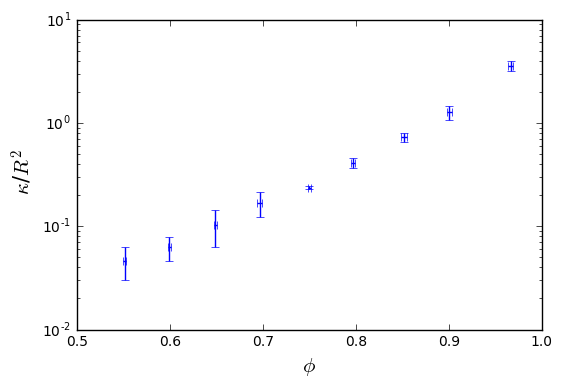

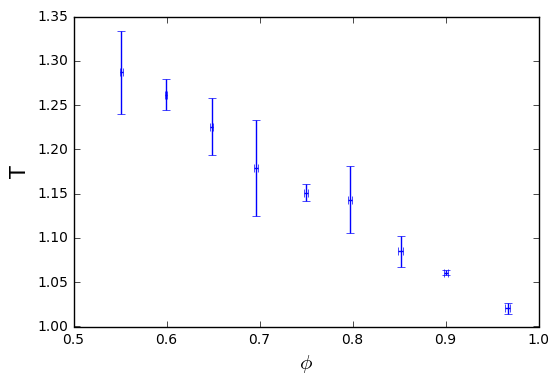

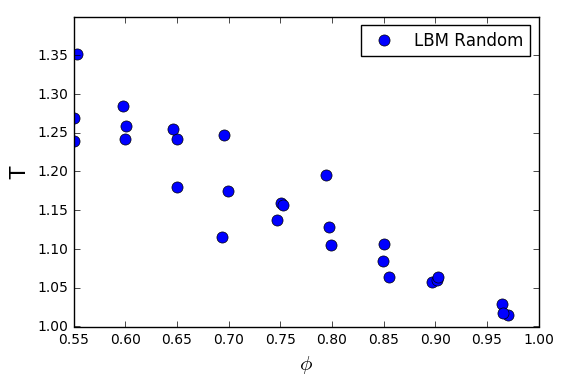

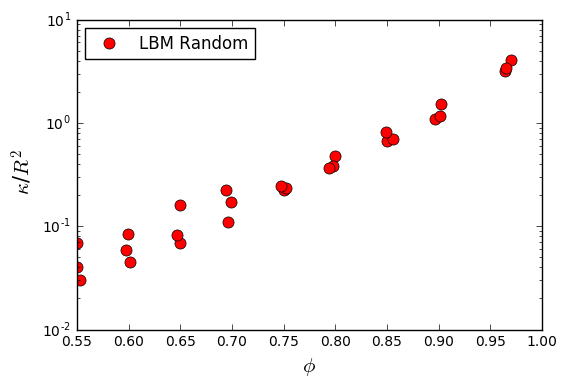

In [1]:
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
from math import *
import scipy.optimize as optimize
from scipy.optimize import curve_fit

por = np.loadtxt('porosity.txt')
phi = np.power(por,3)

per = np.loadtxt('permeability.txt')
per_nor = per/(12**2)

tor = np.loadtxt('tortuosity.txt')
t = np.power(tor,2)

x = por
y = phi/t

#print por.reshape(-1,3)
por_avg = np.mean(por.reshape(-1,3),axis=1)
per_avg = np.mean(per_nor.reshape(-1,3),axis=1)
tor_avg = np.mean(tor.reshape(-1,3),axis=1)

#print por_avg
por_stddev = np.std(por.reshape(-1,3),axis=1)
per_stddev = np.std(per_nor.reshape(-1,3),axis=1)
tor_stddev = np.std(tor.reshape(-1,3),axis=1)
#print por_stddev

por_err = por_stddev
per_err = per_stddev
tor_err = tor_stddev

fig1 = plt.figure()
plt.yscale('log')
plt.errorbar(por_avg, per_avg, xerr=por_err,yerr=per_err,ls = 'None')
plt.xlabel('$\phi$',fontsize = 15,fontweight='bold')
plt.ylabel(' $\kappa$/$R^2$',fontsize = 15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(numpoints=1,loc=2,prop={'size':12})
plt.show()
fig1.savefig('per_err.png')

fig2 = plt.figure()
plt.errorbar(por_avg, tor_avg, xerr=por_err,yerr=tor_err,ls = 'None')
plt.xlabel('$\phi$',fontsize = 15,fontweight='bold')
plt.ylabel('T',fontsize = 15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(numpoints=1,loc=2,prop={'size':12})
plt.show()
fig2.savefig('tor_err.png')


fig3 = plt.figure()
plt.plot(por,tor,'bo',markersize=8, label = 'LBM Random')
plt.xlabel('$\phi$',fontsize = 15,fontweight='bold')
plt.ylabel(' T ',fontsize = 15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(numpoints=1,loc=1,prop={'size':12})
plt.show()
fig3.savefig('plot_tor.png')

fig4 = plt.figure()
plt.yscale('log')
plt.plot(por,per_nor,'ro',markersize=8, label = 'LBM Random')
plt.xlabel('$\phi$',fontsize = 15,fontweight='bold')
plt.ylabel(' $\kappa$/$R^2$',fontsize = 15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(numpoints=1,loc=2,prop={'size':12})
plt.show()
fig4.savefig('plot_per.png')